In [46]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input,Dense, Conv2D, Conv2DTranspose, MaxPooling2D, Flatten, UpSampling2D, Reshape
from tensorflow.keras.models import Model,Sequential

In [47]:
mnist = tf.keras.datasets.mnist.load_data()
(x_train, y_train), (x_test, y_test) = mnist

In [48]:
print("x_train: ", x_train.shape)
print("y_train: ", y_train.shape)
print("x_test: ", x_test.shape)
print("y_test: ", y_test.shape)

x_train:  (60000, 28, 28)
y_train:  (60000,)
x_test:  (10000, 28, 28)
y_test:  (10000,)


In [49]:
x_train = tf.cast(x_train, tf.float32)
x_train0 = x_train/255
x_train90 = np.rot90(x_train, k=1, axes=(1, 2))
x_test = tf.cast(x_test, tf.float32)
x_test0 = x_test/255
x_test90 = np.rot90(x_test, k=1, axes=(1, 2))

In [50]:
print("x_train0: ", x_train0.shape)
print("x_train90: ", x_train90.shape)
print("x_test0: ", x_test0.shape)
print("x_test0: ", x_test0.shape)

x_train0:  (60000, 28, 28)
x_train90:  (60000, 28, 28)
x_test0:  (10000, 28, 28)
x_test0:  (10000, 28, 28)


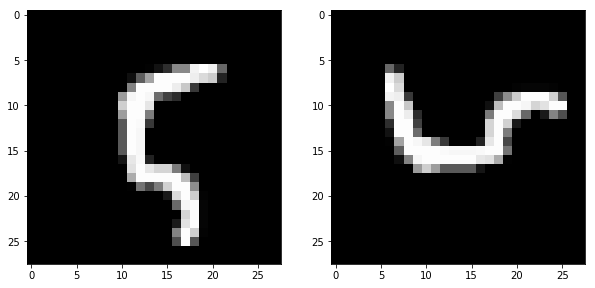

In [51]:
index = 100
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(1,2,1)
plt.imshow(np.reshape(x_train0[index], (28, 28)), cmap="gray")
fig.add_subplot(1,2,2)
plt.imshow(np.reshape(x_train90[index], (28, 28)), cmap="gray")

Initialize the parameters

In [52]:
input_img = Input(shape=(28,28,1))
x = Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same')(input_img)
x = MaxPooling2D(pool_size=(2,2))(x)
encoded = Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same')(x)

x = Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same')(encoded)
x = UpSampling2D(size=(2,2))(x)
decoded = Conv2D(filters=1,kernel_size=(3,3), activation='sigmoid', padding='same')(x)

model = Model(input_img, decoded ,name='Self-Autoencoder_CNN')

model.compile(optimizer='Adam',loss='binary_crossentropy')

print(model.summary())


Model: "Self-Autoencoder_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_20 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_21 (Conv2D)          (None, 14, 14, 8)         1160      
                                                                 
 conv2d_22 (Conv2D)          (None, 14, 14, 16)        1168      
                                                                 
 up_sampling2d_5 (UpSampling  (None, 28, 28, 16)       0         
 2D)                                          

Epoch 1/5
235/235 [==============================] - 32s 132ms/step - loss: 0.1829 - val_loss: 0.0710
Epoch 2/5
235/235 [==============================] - 31s 132ms/step - loss: 0.0693 - val_loss: 0.0672
Epoch 3/5
235/235 [==============================] - 31s 132ms/step - loss: 0.0668 - val_loss: 0.0658
Epoch 4/5
235/235 [==============================] - 31s 132ms/step - loss: 0.0658 - val_loss: 0.0650
Epoch 5/5
235/235 [==============================] - 31s 132ms/step - loss: 0.0652 - val_loss: 0.0646


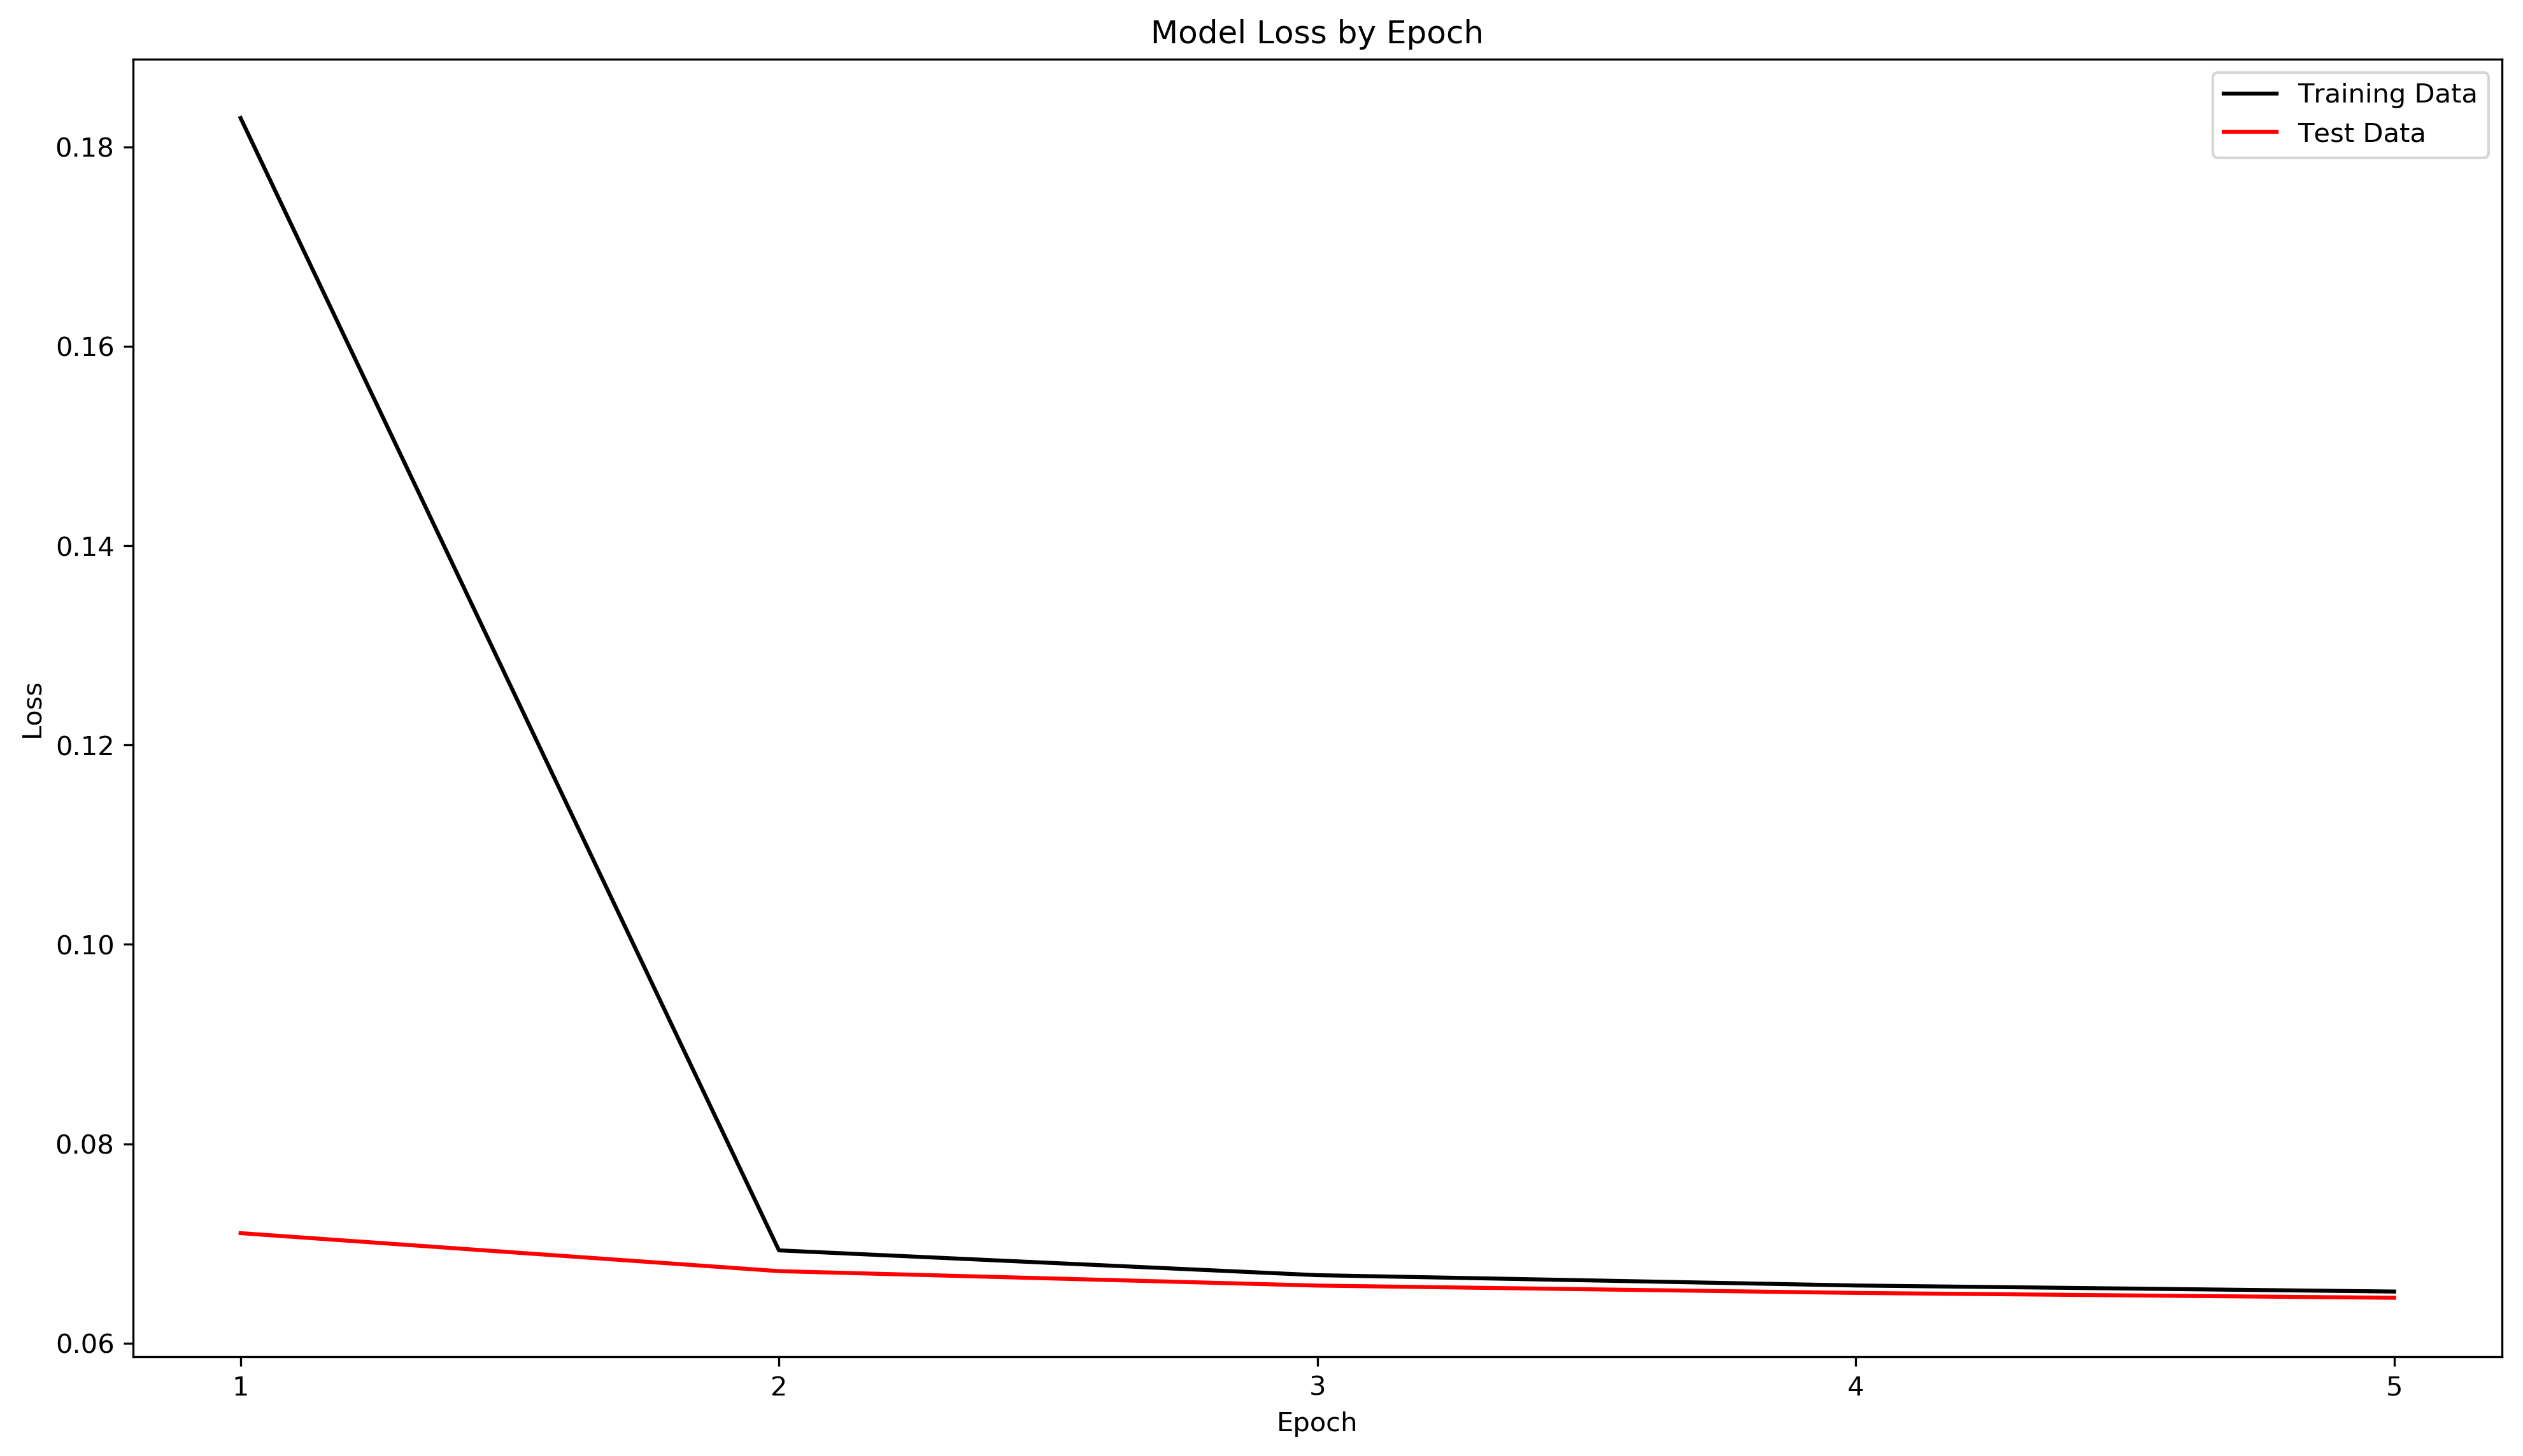

In [53]:
history = model.fit(x_train0, x_train0, batch_size=256, epochs=5, validation_data=(x_test0, x_test0))

# Plot a loss chart
fig, ax = plt.subplots(figsize=(16,9), dpi=300)
plt.title(label='Model Loss by Epoch', loc='center')

ax.plot(history.history['loss'], label='Training Data', color='black')
ax.plot(history.history['val_loss'], label='Test Data', color='red')
ax.set(xlabel='Epoch', ylabel='Loss')
plt.xticks(ticks=np.arange(len(history.history['loss'])), labels=np.arange(1, len(history.history['loss'])+1))
plt.legend()

plt.show()

In [54]:
x_reconstruct0 = autoencoder.predict(x_test)

313/313 [==============================] - 2s 6ms/step


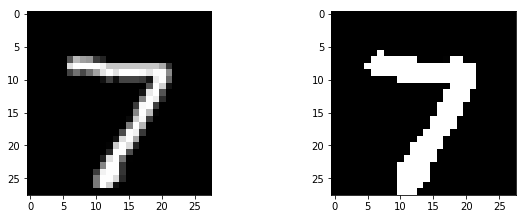

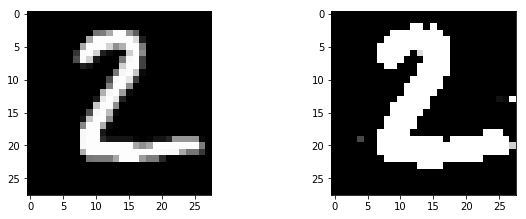

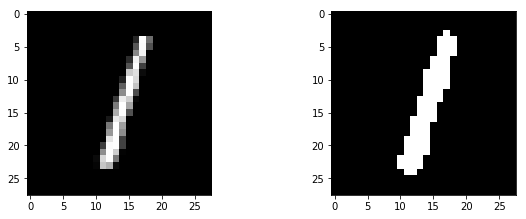

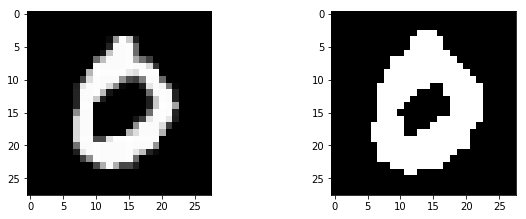

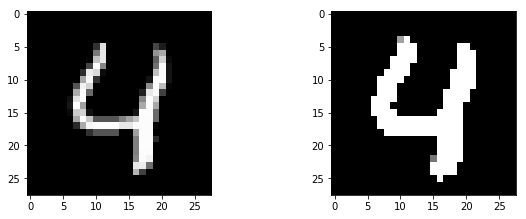

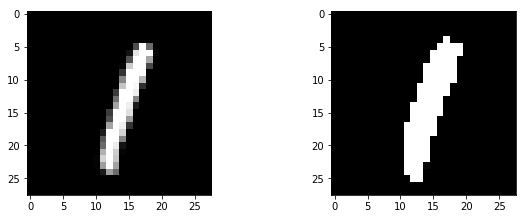

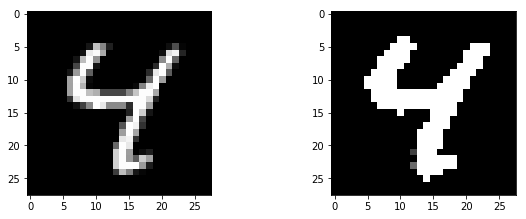

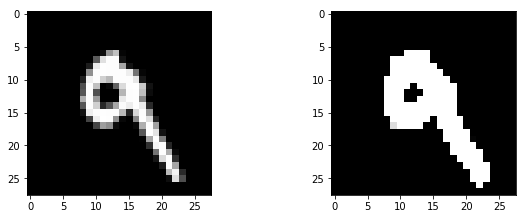

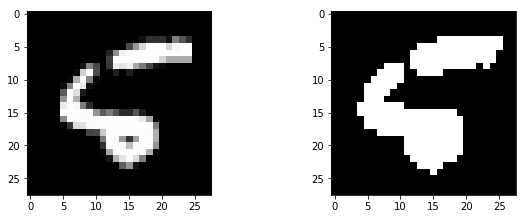

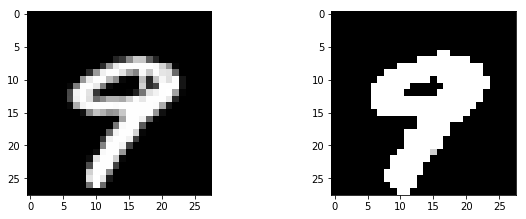

In [55]:
index = 0
t=10
for i in range(10):
    fig = plt.figure(figsize=(10, 40))
    fig.add_subplot(t,2,1)
    plt.imshow(np.reshape(x_test0[index+i], (28, 28)), cmap="gray")
    fig.add_subplot(t,2,2)
    plt.imshow(np.reshape(x_reconstruct0[index+i], (28, 28)), cmap="gray")

In [56]:
x_reconstruct0[1]

array([[[9.54353891e-04],
        [1.02388390e-06],
        [5.72661463e-07],
        [2.73633909e-14],
        [9.71744056e-22],
        [4.70049898e-37],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [1.52453364e-29],
        [1.83028366e-08],
        [5.37272967e-07],
        [4.34991962e-05],
        [1.08016808e-04],
        [9.82124475e-04]],

       [[1.34588745e-05],
        [3.94802030e-12],
        [2.61872989e-13],
        [5.96411104e-28],
        [6.13452252e-34],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0